In [230]:
import pandas as pd
import sqlite3

In [231]:
con = sqlite3.connect("../data/checking-logs.sqlite.sqlite copy")

## analyze only the users and not the admins

In [232]:
df = pd.io.sql.read_sql("SELECT timestamp FROM checker WHERE uid LIKE 'user_%';", parse_dates=['timestamp'], con=con)
df = df.groupby([df['timestamp'].dt.date, df['timestamp'].dt.hour]).count()
df.index.set_names('hour', level=1, inplace=True)
df.reset_index('hour', inplace=True)
df.rename(columns={'timestamp' : 'commits'}, inplace=True)
print(df)

            hour  commits
timestamp                
2020-04-17     5       13
2020-04-17    11        8
2020-04-17    12        2
2020-04-18     7        1
2020-04-18    13        5
...          ...      ...
2020-05-21    16        4
2020-05-21    17        1
2020-05-21    18        2
2020-05-21    19        8
2020-05-21    20       10

[288 rows x 2 columns]


## for each hour, calculate the average number of commits on working days and on weekends (if there were no commits in an hour, do not use it to calculate the average) use these values for your graph

In [233]:
df.reset_index(inplace=True)
df['business'] = df['timestamp'].apply(lambda x: bool(len(pd.bdate_range(x, x))))
df['business'] = df['business'].map({False: 'weekend', True: 'working_day'})
df = df.groupby([df['business'], df['hour']]).mean()
df = df.pivot_table(index='hour', values='commits', columns='business', margins_name=["working_day", "weekend"])
df.loc[2] = {'working_day': 0, 'weekend': 0}
df.loc[4] = {'working_day': 0, 'weekend': 0}
df.sort_index(inplace=True)
df.fillna(0, inplace=True)
df

/tmp/ipykernel_14047/1744631396.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby([df['business'], df['hour']]).mean()


business,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,0.000000
2,0.000000,0.000000
3,1.000000,2.000000
4,0.000000,0.000000
5,2.000000,7.500000
6,0.000000,1.500000
7,4.000000,5.166667
8,7.000000,3.700000


## the fontsize and the figsize remain the same

## choose a palette that you really enjoy, you do not have to replicate it from the graph above

array([<AxesSubplot: title={'center': 'weekend'}, xlabel='hour'>,
       <AxesSubplot: title={'center': 'working_day'}, xlabel='hour'>],
      dtype=object)

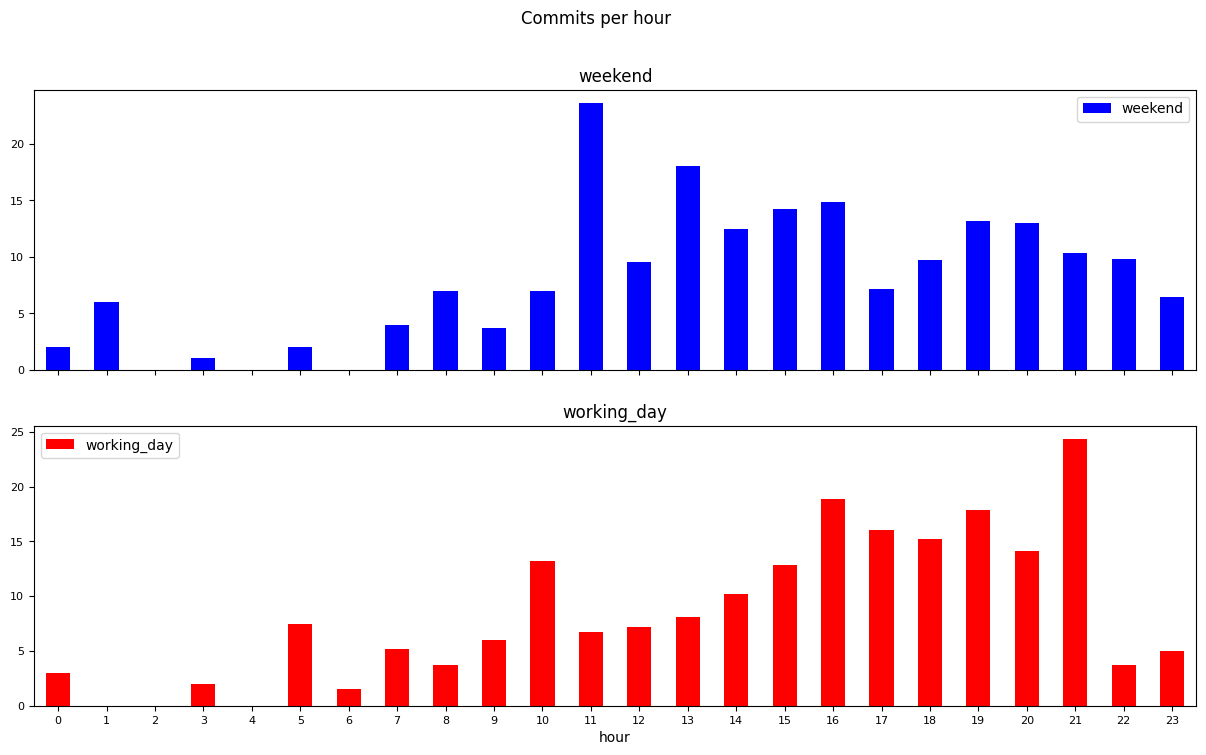

In [234]:
df.plot.bar(fontsize=8, figsize=(15, 8), subplots=True, sharex=True, title='Commits per hour', rot=0, color=['blue', 'red'])

## Is the dynamic different on working days and weekends?

In [235]:
print("weekend: 11\nworking_day: 21")

weekend: 11
working_day: 21


In [236]:
con.close()